[출처](https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=2)

In [1]:
import pandas as pd
import numpy as np

## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [2]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [4]:
# a.sum()

#### NaN: 누락된 수치 데이터

In [5]:
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [6]:
0 + np.nan

nan

In [7]:
np.nan + np.nan

nan

In [8]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [10]:
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [11]:
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [12]:
s = pd.Series(range(5), dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [13]:
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [15]:
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [17]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리


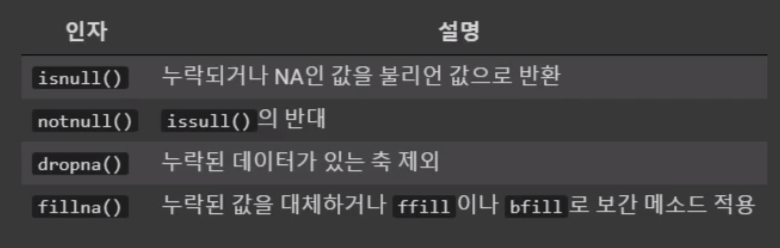

In [18]:
s = pd.Series([1, 2, np.nan, 'String', None])

In [19]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [20]:
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [21]:
s.dropna()

0         1
1         2
3    String
dtype: object

In [26]:
df = pd.DataFrame(np.random.randn(10,3), index=range(10), columns=['A', 'B','C'])

In [27]:
df.dropna(axis='columns')

,A,B,C
0,-0.799426,-0.128818,-2.157943
1,2.114976,-1.232710,0.185729
2,1.448840,0.633790,-0.172901
3,0.350847,-0.046542,0.609040
4,-0.888731,-1.203356,-0.431733
5,1.334936,0.773020,-0.232468
6,-0.504853,1.440602,-0.179393
7,-1.478382,0.183161,-2.261174
8,2.184620,-0.466488,-0.102733
9,0.576620,-0.034912,-1.918614


In [28]:
df[3] = np.nan

In [29]:
df

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


In [30]:
df.dropna(axis='columns', how='all')

,A,B,C
0,-0.799426,-0.128818,-2.157943
1,2.114976,-1.232710,0.185729
2,1.448840,0.633790,-0.172901
3,0.350847,-0.046542,0.609040
4,-0.888731,-1.203356,-0.431733
5,1.334936,0.773020,-0.232468
6,-0.504853,1.440602,-0.179393
7,-1.478382,0.183161,-2.261174
8,2.184620,-0.466488,-0.102733
9,0.576620,-0.034912,-1.918614


In [31]:
df.dropna(axis='rows', thresh=3)

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


In [32]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [33]:
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [34]:
s.fillna(method='ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [35]:
s.fillna(method='bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [36]:
df

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


In [37]:
df.fillna(method='ffill', axis=0)

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


In [38]:
df.fillna(method='ffill', axis=1)

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,-2.157943
1,2.114976,-1.232710,0.185729,0.185729
2,1.448840,0.633790,-0.172901,-0.172901
3,0.350847,-0.046542,0.609040,0.609040
4,-0.888731,-1.203356,-0.431733,-0.431733
5,1.334936,0.773020,-0.232468,-0.232468
6,-0.504853,1.440602,-0.179393,-0.179393
7,-1.478382,0.183161,-2.261174,-2.261174
8,2.184620,-0.466488,-0.102733,-0.102733
9,0.576620,-0.034912,-1.918614,-1.918614


In [39]:
df.fillna(method='bfill', axis=0)

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


In [40]:
df.fillna(method='bfill', axis=1)

,A,B,C,3
0,-0.799426,-0.128818,-2.157943,NaN
1,2.114976,-1.232710,0.185729,NaN
2,1.448840,0.633790,-0.172901,NaN
3,0.350847,-0.046542,0.609040,NaN
4,-0.888731,-1.203356,-0.431733,NaN
5,1.334936,0.773020,-0.232468,NaN
6,-0.504853,1.440602,-0.179393,NaN
7,-1.478382,0.183161,-2.261174,NaN
8,2.184620,-0.466488,-0.102733,NaN
9,0.576620,-0.034912,-1.918614,NaN


### 중복 제거

In [41]:
df = pd.DataFrame({'c1': ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                   'c2': [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [42]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [43]:
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [44]:
s = pd.Series([1., 2., -999., 3., -1000., 4.])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [46]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [47]:
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [48]:
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly